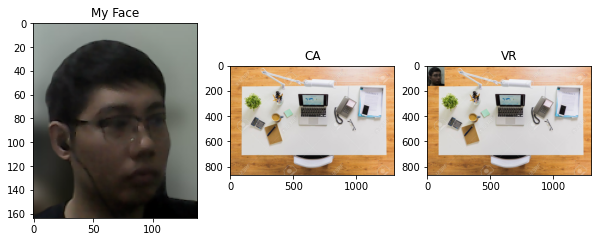

img_face.shape: (164, 138, 3)
img_ca.shape: (866, 1300, 3)


In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_face = cv.imread('assets/gavFace.png')

plt.figure(figsize=(10, 6))
# BGR to RGB
img_face_rgb = img_face[:, :, ::-1]
plt.subplot(1, 3, 1)
plt.title('My Face')
plt.imshow(img_face_rgb)


img_ca = cv.imread('assets/ca.jpg')

img_ca_rgb = img_ca[:, :, ::-1]
plt.subplot(1, 3, 2)
plt.title('CA')
plt.imshow(img_ca_rgb)


h, w, c = img_face.shape

h2, w2, c2 = img_ca.shape

if h >= h2 or w >= w2:
    img_face = cv.resize(img_face, None, fx=2, fy=2,
                         interpolation=cv.INTER_AREA)

img_ca[:h, :w] = img_face

imgRGB = img_ca[:, :, ::-1]

plt.subplot(1, 3, 3)
plt.title('VR')
plt.imshow(imgRGB)


plt.show()
print(f'img_face.shape: {img_face.shape}')
print(f'img_ca.shape: {img_ca.shape}')


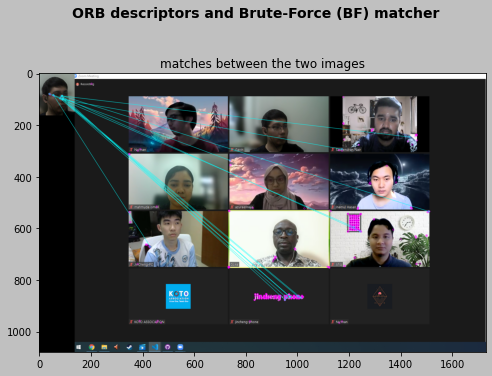

In [46]:
# Import required packages:
import cv2 as cv
from matplotlib import pyplot as plt


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(8, 6))
plt.suptitle("ORB descriptors and Brute-Force (BF) matcher", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the 'query' and 'scene' image:
image_query = cv.imread('assets/gavFace.png')
image_scene = cv.imread('assets/scene.png')

# Initiate ORB detector:
orb = cv.ORB_create()

# Detect the keypoints and compute the descriptors with ORB:
keypoints_1, descriptors_1 = orb.detectAndCompute(image_query, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(image_scene, None)

# Create BFMatcher object
# First parameter sets the distance measurement (by default it is cv.NORM_L2)
# The second parameter crossCheck (which is False by default) can be set to True in order to return only
# consistent pairs in the matching process (the two features in both sets should match each other)
bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors:
bf_matches = bf_matcher.match(descriptors_1, descriptors_2)

# Sort the matches in the order of their distance:
bf_matches = sorted(bf_matches, key=lambda x: x.distance)

# Draw first 20 matches:
result = cv.drawMatches(image_query, keypoints_1, image_scene, keypoints_2, bf_matches[:20], None,
                         matchColor=(255, 255, 0), singlePointColor=(255, 0, 255), flags=0)

# Plot the images:
# Convert BGR image to RGB
imgRGB = result[:, :, ::-1]

plt.imshow(imgRGB)
plt.title("matches between the two images")

# show
plt.show()

Decoded Data: 'Hello World in QR!!!'


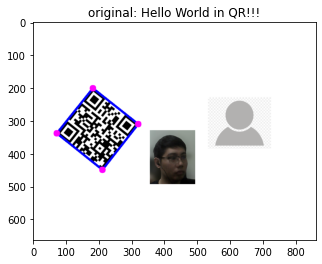

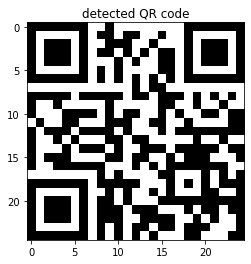

In [49]:
"""
QR code detection
"""

# Import required packages:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



# Load input image:
# img = cv.imread("assets/qrcode2.png")
img = cv.imread("assets/image_with_qr.png")

# Create QR code detector:
qr_code_detector = cv.QRCodeDetector()

# Detect and decode the QR code using qr_code_detector.detectAndDecode()
# This function returns the data, the array of vertices of the found QR code quadrangle and
# the image containing the rectified binarized QR code:
data, vertices, rectified_qr_code_binarized = qr_code_detector.detectAndDecode(img)

if len(data) > 0:
    print("Decoded Data: '{}'".format(data))

    # Show the detection in the image:
    pts = np.int32(vertices).reshape(-1, 2)

    for j in range(pts.shape[0]):
        cv.line(img, tuple(pts[j]), tuple(pts[(j + 1) % pts.shape[0]]), (255, 0, 0), 5)

    for j in range(pts.shape[0]):
        cv.circle(img, tuple(pts[j]), 10, (255, 0, 255), -1)

    # Convert BGR image to RGB
    imgRGB = img[:, :, ::-1]
    plt.imshow(imgRGB)
    plt.title("original: " + data)    
    # Show the Figure:
    plt.show()


    # Convert binarized image to uint8:
    rectified_image = np.uint8(rectified_qr_code_binarized)
    rectified_image = cv.cvtColor(rectified_image, cv.COLOR_GRAY2BGR)

    # Plot the images:
    # Convert BGR image to RGB
    imgRGB = rectified_image[:, :, ::-1]
    plt.imshow(imgRGB)
    plt.title("detected QR code")
    plt.show()


else:
    print("QR Code not detected")

In [ ]:
"""
Snapchat-based augmented reality OpenCV moustache overlay
"""

# Import required packages:
import cv2 as cv

# Load cascade classifiers for face and nose detection:
face_cascade = cv.CascadeClassifier("../samples/data/haarcascade_frontalface_default.xml")
nose_cascade = cv.CascadeClassifier("../samples/data/haarcascade_mcs_nose.xml")

# Load moustache image. The parameter -1 reads also de alpha channel
# Open 'moustaches.sgv' to see more moustaches that can be used
# Therefore, the loaded image has four channels (Blue, Green, Red, Alpha):
img_moustache = cv.imread('../samples/data/moustache.png', -1)

# Create the mask for the moustache:
img_moustache_mask = img_moustache[:, :, 3]
# cv.imshow("img moustache mask", img_moustache_mask)

# You can use a test image to adjust the ROIS:
# test_face = cv.imread("../samples/data/face_test.png")
# test_face = cv.imread("assets/numan_face.png")
# test_face = cv.resize(test_face, None, fx=2, fy=2, interpolation=cv.INTER_AREA)

# Convert moustache image to BGR (eliminate alpha channel):
img_moustache = img_moustache[:, :, 0:3]

In [1]:
"""
Snapchat-based augmented reality OpenCV glasses overlay
"""

# Import required packages:
import cv2 as cv

# Load cascade classifiers for face and eyepair detection:
face_cascade = cv.CascadeClassifier("../samples/data/haarcascade_frontalface_default.xml")
eyepair_cascade = cv.CascadeClassifier("../samples/data/haarcascade_mcs_eyepair_big.xml")

# Load glasses image. The parameter -1 reads also de alpha channel (if exists)
# Open 'glasses.sgv' to see more glasses that can be used
# Therefore, the loaded image has four channels (Blue, Green, Red, Alpha):
img_glasses = cv.imread('assets/glasses.png', -1)

# img_glasses = cv.cvtColor(img_glasses,cv.COLOR_BGR2BGRA)
# Create the mask for the glasses:
img_glasses_mask = img_glasses[:, :, 3]
# cv.imshow("img glasses mask", img_glasses_mask)

# Convert glasses image to BGR (eliminate alpha channel):
img_glasses = img_glasses[:, :, 0:3]

# You can use a test image to adjust the ROIS:
# test_face = cv.imread("../samples/data/face_test.png")
# test_face = cv.imread("assets/numan_face.png")

# Create VideoCapture object to get images from the webcam:
video_capture = cv.VideoCapture(0)

while True:
    # Capture frame from the VideoCapture object:
    ret, frame = video_capture.read()

    # Just for debugging purposes and to adjust the ROIS:
    # frame = test_face.copy()

    # Convert frame to grayscale:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect faces using the function 'detectMultiScale()'
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face:
    for (x, y, w, h) in faces:
        # Draw a rectangle to see the detected face (debugging purposes):
        # cv.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

        # Create the ROIS based on the size of the detected face:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect the eyepair inside the detected face:
        eyepairs = eyepair_cascade.detectMultiScale(roi_gray)

        # Iterate over the detected eyepairs (inside the face):
        for (ex, ey, ew, eh) in eyepairs:
            # Draw a rectangle to see the detected eyepair (debugging purposes):
            # cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 255), 2)

            # Calculate the coordinates where the glasses will be placed:
            x1 = int(ex - ew / 10)
            x2 = int((ex + ew) + ew / 10)
            y1 = int(ey)
            y2 = int(ey + eh + eh / 2)

            if x1 < 0 or x2 < 0 or x2 > w or y2 > h:
                continue

            # Draw a rectangle to see where the glasses will be placed (debugging purposes):
            # cv.rectangle(roi_color, (x1, y1), (x2, y2), (0, 255, 255), 2)

            # Calculate the width and height of the image with the glasses:
            img_glasses_res_width = int(x2 - x1)
            img_glasses_res_height = int(y2 - y1)

            # Resize the mask to be equal to the region were the glasses will be placed:
            mask = cv.resize(img_glasses_mask, (img_glasses_res_width, img_glasses_res_height))

            # Create the invert of the mask:
            mask_inv = cv.bitwise_not(mask)

            # Resize img_glasses to the desired (and previously calculated) size:
            img = cv.resize(img_glasses, (img_glasses_res_width, img_glasses_res_height))

            # Take ROI from the BGR image:
            roi = roi_color[y1:y2, x1:x2]

            # Create ROI background and ROI foreground:
            roi_bakground = cv.bitwise_and(roi, roi, mask=mask_inv)
            roi_foreground = cv.bitwise_and(img, img, mask=mask)

            # Show both roi_bakground and roi_foreground (debugging purposes):
            # cv.imshow('roi_bakground', roi_bakground)
            # cv.imshow('roi_foreground', roi_foreground)

            # Add roi_bakground and roi_foreground to create the result:
            res = cv.add(roi_bakground, roi_foreground)

            # Set res into the color ROI:
            roi_color[y1:y2, x1:x2] = res

            break

    # Display the resulting frame
    cv.imshow('Snapchat-based OpenCV glasses filter', frame)
    

    # Press any key to exit
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
video_capture.release()
cv.destroyAllWindows()

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
